# Swedish_Auto_Insurance 

* Done By : Hiba Nabeel Zalloum 22027007
* Supervisor : Dr. Mutaz AbuSarah

In [20]:
# import Liabrary
import numpy as np #use for matrix
import pandas as pd #use for Dataframe 
import matplotlib.pyplot as plt #use for ploting and data visualization 
import seaborn as sns #Visualization
from sklearn.linear_model import LinearRegression #linear regression
from sklearn.linear_model import Ridge #ridge regression
from sklearn import linear_model  #from linear model we can use lasso model 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# Discribe and Analysis Data

In [21]:
df = pd.read_csv(r"C:\Users\User\Downloads\Swedish_Auto_Insurance (1).csv")
df.head() # the first 5 rows from the data


,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [22]:
df.info

<bound method DataFrame.info of       X      y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
..  ...    ...
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]>

In [23]:
df.shape

(63, 2)

In [24]:
df.describe()


,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


# Slipting Data 

In [25]:
X = df.iloc[:,0].values
X = X.reshape([X.shape[0], 1])
y = df.iloc[:, -1].values


#print(X)
#Y

# Data Normalization

In [26]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,X,y
0,0.870968,0.929654
1,0.153226,0.109427
2,0.104839,0.037186
3,1.000000,1.000000
4,0.322581,0.282804


# Building Model

* Linear Regression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred_lr = model.predict(X_train)
#y_pred_lr


print ('coef:{}'.format(model.coef_))
print ('intercept:{}'.format(model.intercept_))
print ('Training Score:{}'.format(model.score(X_train,y_train)))
print ('Test Score:{}'.format(model.score(X_test,y_test)))

coef:[0.0087809]
intercept:0.024772691241516015
Training Score:0.7063435137571087
Test Score:0.8880527542012345


* data Visualisation

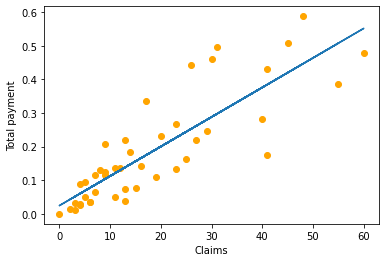

In [28]:
plt.scatter(X_train, y_train, color = 'Orange')
plt.plot(X_train, y_pred_lr)
plt.xlabel('Claims')
plt.ylabel('Total payment')
plt.show()

* Ridge Regression

In [29]:
ridge = Ridge().fit(X_train,y_train)
print ('Training Score:{}'.format(ridge.score(X_train,y_train)))
print ('Test Score:{}'.format(ridge.score(X_test,y_test)))

Training Score:0.7063435067629908
Test Score:0.8880831281930621


In [30]:
ridge = Ridge(alpha = 0.30).fit(X_train,y_train)
print ('Training Score:{}'.format(ridge.score(X_train,y_train)))
print ('Test Score:{}'.format(ridge.score(X_test,y_test))) 


Training Score:0.7063435131275504
Test Score:0.8880618702661232


same score with alpha Changed !! 
we have underfitting

* Lasso Regression

In [31]:
lasso = linear_model.Lasso().fit(X_train,y_train)
print('Training Score:{}'.format(lasso.score(X_train,y_train)))
print ('Test Score:{}'.format(lasso.score(X_test,y_test))) 

Training Score:0.5306941392273061
Test Score:0.6537769251879676


we have underfitting and bad score !!

In [32]:
lasso00001 = linear_model.Lasso(alpha = 0.0001, max_iter= 100000).fit(X_train,y_train)
print('Training Score:{}'.format(lasso00001.score(X_train,y_train)))
print ('Test Score:{}'.format(lasso00001.score(X_test,y_test))) 

Training Score:0.706343512000615
Test Score:0.8880679795932116


When change alpha the score changed   to the better but not good result
and we have Underfitting

In [39]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
KNeighborsRegressor()



KNeighborsRegressor()